# Pre-Lecture 

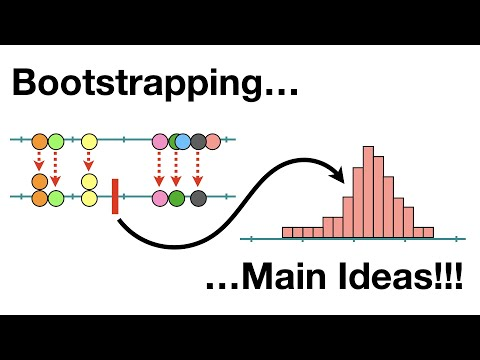

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=400, height=250)

Question 1

The difference between "standard error of the mean" and the "standard deviation" of the original dataset is that the "standard error of the mean" of the original dataset **is** the "standard deviation" of dataset of the bootstrapped means. So the standard deviation of the original dataset is the spread of the values from the mean, while the standard error of the mean is the standard deviation of the means of the bootstrapped datasets, meaning that it is how much the mean would be expected to vary if we took multiple samples from the original dataset. 

Question 2



To create a 95% confidence interval that covers 95% of the bootstrapped sample means using the standard error of the mean, we need to identify the values that capture the middle 95% of this distribution, specifically the 2.5% and 97.5% percentiles. The range between these two values forms your 95% confidence interval, or by going 2 standard errors outward to the left and to the right from the sample mean, showing where you can be 95% confident that the true population mean lies.

Question 3

To create a 95% bootstrapped confidence interval without using the standard error, we need to sort the bootstrapped dataset in ascending order and identify the values at the 2.5th and 97.5th percentile. These values form the lower and upper bounds of the confidence interval. This interval provides a 95% confidence level that the true population mean lies within this range, directly based on the bootstrapped data.

Question 4

In [3]:
import numpy as np

# Function to generate a bootstrap confidence interval
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, statistic=np.mean, confidence_level=0.95):
    """
    This function calculates the bootstrap confidence interval for a given statistic (e.g., mean, median) 
    using resampling with replacement.

    :param data: array-like, the sample data to bootstrap from
    :param num_bootstrap_samples: int, the number of bootstrap samples to draw
    :param statistic: function, the statistic to compute (e.g., np.mean for mean, np.median for median)
    :param confidence_level: float, the confidence level (default is 95%)
    
    :return: tuple, the lower and upper bounds of the confidence interval
    """
    # List to store the statistic for each bootstrap sample
    bootstrap_statistics = []

    # Generate bootstrap samples and compute the statistic for each sample
    for _ in range(num_bootstrap_samples):
        # Sample with replacement from the original data
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic (mean, median, etc.) for this bootstrap sample
        bootstrap_statistic = statistic(bootstrap_sample)
        # Store the computed statistic
        bootstrap_statistics.append(bootstrap_statistic)

    # Sort the bootstrap statistics
    sorted_bootstrap_statistics = np.sort(bootstrap_statistics)

    # Calculate the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile

    # Get the values at the percentiles
    lower_bound = np.percentile(sorted_bootstrap_statistics, 100 * lower_percentile)
    upper_bound = np.percentile(sorted_bootstrap_statistics, 100 * upper_percentile)

    return lower_bound, upper_bound

# Example usage with sample data (population mean)
sample_data = np.array([1.2, 2.4, 3.5, 4.8, 5.0, 5.2, 5.7, 6.1, 7.3, 8.4])
mean_ci = bootstrap_confidence_interval(sample_data, statistic=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# Example usage with sample data (population median)
median_ci = bootstrap_confidence_interval(sample_data, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: (3.649500000000001, 6.170999999999999)
95% Bootstrap Confidence Interval for the Median: (3.5, 6.5)


# Post-Lecture

Question 5

The population parameter (like true mean) is the unknown value we want to estimate, while the sample statistic (like sample mean) is what we calculate from the data. The confidence interval uses the sample statistic to estimate a range where the true population parameter probably lies, accounting for uncertainty due to sampling. This helps us understand that the interval provides an estimate for the unknown population value, not the sample statistic itself.

ChatGPT summary:

In this chat, we discussed key statistical concepts:

Standard Deviation (SD) vs. Standard Error of the Mean (SEM): SD measures the spread of individual data points, while SEM quantifies how much the sample mean is expected to vary.

95% Confidence Intervals (CI):

We explored how SEM can be used to create a 95% CI by calculating the margin of error (SEM × 1.96) and adding/subtracting it from the sample mean.
We also discussed creating a 95% CI for bootstrapped sample means using either the SEM with a normal distribution or the percentiles from the bootstrapped distribution.
Bootstrapping: We covered how bootstrapped confidence intervals work by resampling and using percentiles (e.g., for the median) and how this differs from using the SEM.

Population Parameters vs. Sample Statistics: We clarified the importance of distinguishing between these, with confidence intervals estimating the population parameter based on the sample statistic.

Each explanation focused on being concise and applicable to different scenarios, from means to medians.

https://chatgpt.com/share/66fe13ed-be38-8013-a769-e9b70889418e

Question 6

1. Bootstrapping is the process of taking n random values from a dataset– with n the number of values in the dataset– with replacement, so some values can get taken multiple times and some not taken at all. We now have a bootstrapped dataset. Then we take a summary statistic of our choice (e.g. mean) of the boostrapped dataset, and add it to a new dataset (which we can represent by a histogram). We then repeat this whole process many times (possibly thousands), adding the summary statistic of the bootstrapped into the new dataset.


2. The purpose of bootstrapping is to estimate the distribution of a statistic in a single dataset, like the mean, by resampling the values (with replacement). We then get an idea of what would've happened if we had repeated the original experiment many times. This helps us assess the general variability of the statistic and calculate confidence intervals giving us a better idea of the real population's statistics.


3. We would have to sample and generate many bootstrap samples by resampling with replacement. For each bootstrap sample, we calculate the mean, then create a 95% confidence interval from the distribution of these bootstrapped means by finding the 2.5th and 97.5th percentiles. Then we compare the hypothesized mean to the confidence interval: if it falls within the interval, the hypothesized mean is plausible; if it falls outside, it's probably not a good estimate.

Question 7

Since the 95% confidence interval includes 0, 0 is a part of the answers we are confident are possible. This means that the drug may have no effect. We would reject the null hypothesis if the confidence interval didn't include zero, meaning the range of plausible values for the effect excluded zero. We would say with 95% confidence that the drug has an effect.

Question 8 

Problem Introduction: We need to see if AliTech's new vaccine is effective or not. A Null Hypothesis of "no effect" in this context would mean that the vaccine has no effect, neither positive nor negative.
    
Data Visualization: What we're interested in this question is the overall effect of the vaccine, so we need to visualize the effect of the vaccine on each person.


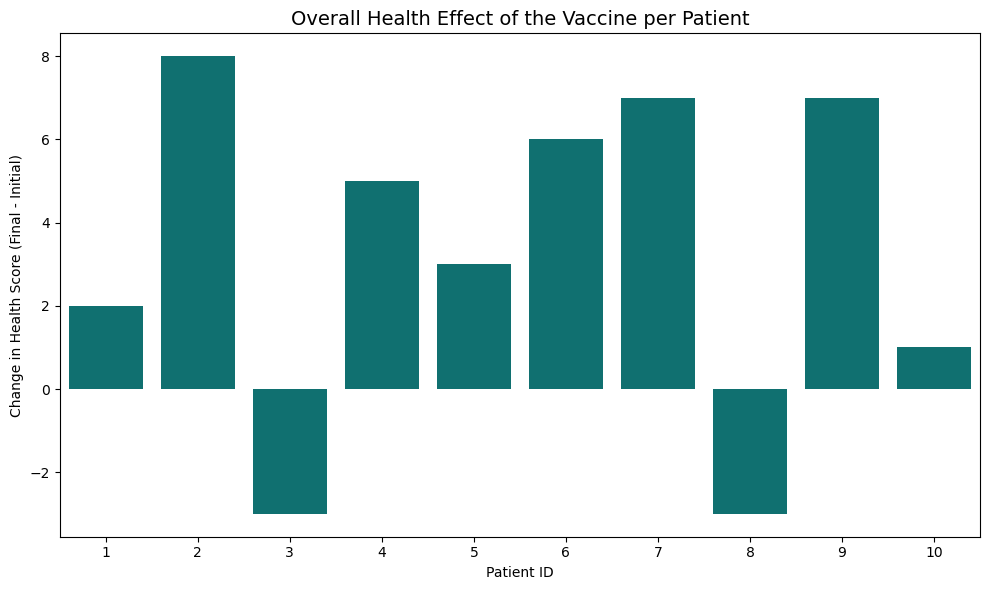

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")

# Calculate the change in health score for each patient
df['HealthEffect'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Visualize the health effect for each patient with consistent opacity (solid color)
plt.figure(figsize=(10, 6))
sns.barplot(x='PatientID', y='HealthEffect', data=df, color='teal')

# Adding labels and title
plt.title('Overall Health Effect of the Vaccine per Patient', fontsize=14)
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score (Final - Initial)')

# Show plot
plt.tight_layout()
plt.show()


And a graph to see the number of people per change in health effect

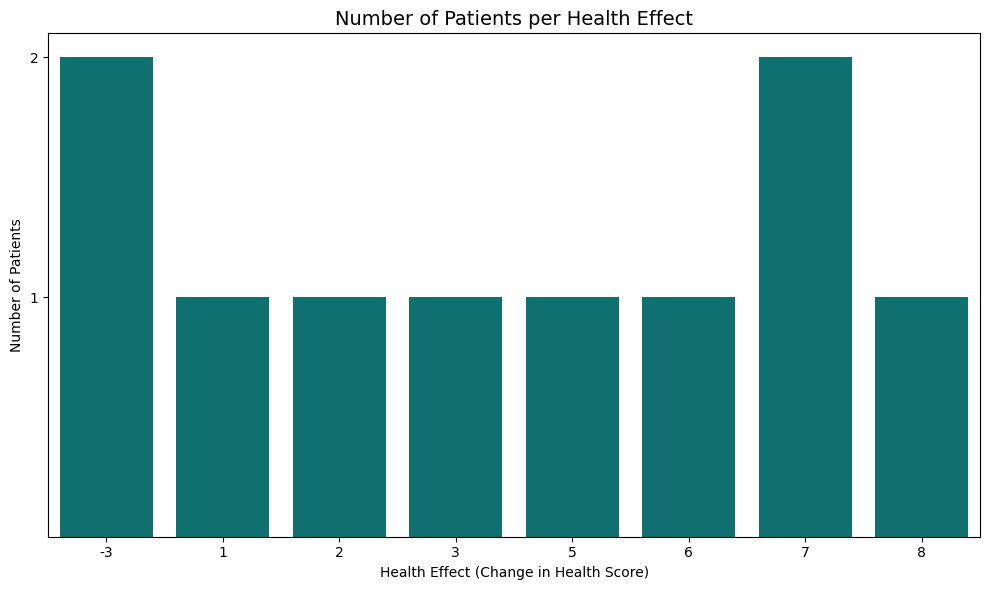

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv("data.csv")

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the change in health score for each patient
df['HealthEffect'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Count the number of patients per health effect value
health_effect_counts = df['HealthEffect'].value_counts().sort_index()

# Visualize the number of patients per health effect value
plt.figure(figsize=(10, 6))
sns.barplot(x=health_effect_counts.index, y=health_effect_counts.values, color='teal')

# Adding labels and title
plt.title('Number of Patients per Health Effect', fontsize=14)
plt.xlabel('Health Effect (Change in Health Score)')
plt.ylabel('Number of Patients')

# Set y-axis to range from 1 to 2 with increments of 1
plt.yticks(range(1, 3))

# Show plot
plt.tight_layout()
plt.show()


A majority of the health effects of the vaccine seem to be positive. To be confident of this hypothesis, we need to bootstrap the dataset and get its mean (many times) to create a histogram of the means. Then we will see if the hypothesis is right.

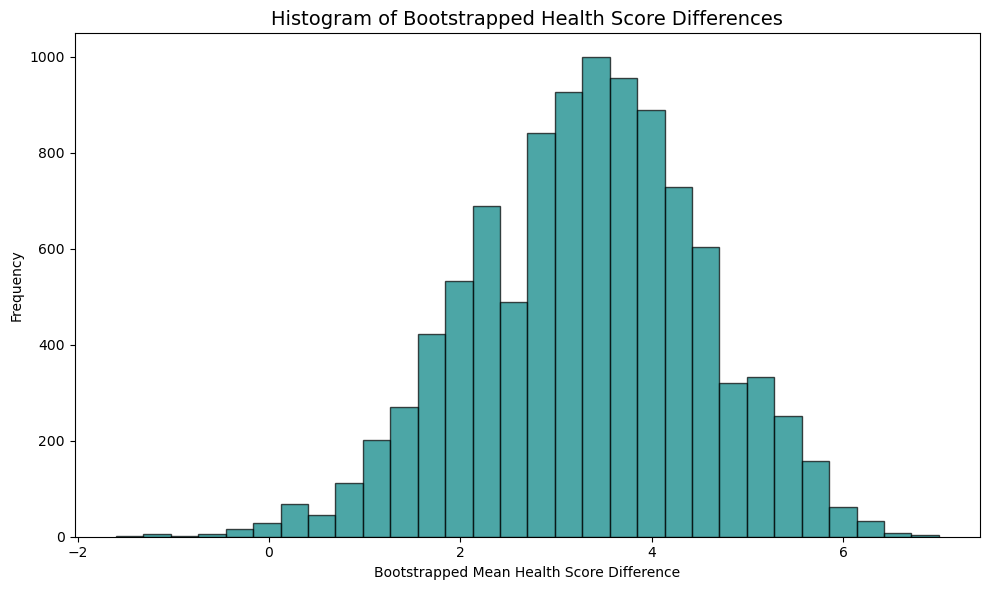

In [9]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Number of bootstrapped datasets
n_bootstraps = 10000

# Create an array to hold the bootstrapped health score differences
bootstrapped_differences = []

# Bootstrap sampling
for _ in range(n_bootstraps):
    # Resample health effects with replacement
    bootstrapped_sample = np.random.choice(df['HealthEffect'], size=len(df['HealthEffect']), replace=True)
    # Calculate the mean difference for the bootstrapped sample
    bootstrapped_differences.append(np.mean(bootstrapped_sample))

# Visualize the distribution of bootstrapped health score differences
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_differences, bins=30, color='teal', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Histogram of Bootstrapped Health Score Differences', fontsize=14)
plt.xlabel('Bootstrapped Mean Health Score Difference')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()
plt.show()


Here we can see the spread of the Bootstrapped health score differences. We now need to grab the 2.5th and the 97.5th percentiles to know the 95% confidence interval.

In [10]:
import numpy as np

# Assuming bootstrapped_differences is your array of bootstrapped mean differences
lower_bound = np.percentile(bootstrapped_differences, 2.5)
upper_bound = np.percentile(bootstrapped_differences, 97.5)

print("2.5th percentile:", lower_bound)
print("97.5th percentile:", upper_bound)


2.5th percentile: 0.9
97.5th percentile: 5.6


We can see that the 2.5th percentile is 0.9 and the 97.5th percentile is 5.6, so we can say that the 95% confidence interval spans from 0.9 to 5.6. This means that the vaccine has an overall positive impact. And since 0 is not a part of this interval, we can say with 95% confidence that Null Hypothesis of "no effect" is not applicable for this vaccine.

Question 9

Mostly 

ChatGPT summary:

Here's a summary of our chat:

Statistical Concepts: We discussed the differences between the standard error of the mean and standard deviation, their roles in confidence intervals, and the significance of distinguishing between population parameters and sample statistics in hypothesis testing.

Bootstrap Methodology: We explored how to use bootstrapping to assess the plausibility of a hypothesized population mean and how to create confidence intervals using bootstrapped sample means.

Data Visualization: You provided a dataset about patients' health scores, and we created various visualizations:

A bar plot comparing Initial and Final Health Scores for each patient.
A plot illustrating the Overall Health Effect of the vaccine on each patient.
A bar plot showing the Number of Patients per change in health score.
Bootstrapping Analysis: We discussed generating 10,000 bootstrapped datasets of health score differences and how to visualize this with a histogram.

Percentile Calculation: You asked how to determine the 2.5th and 97.5th percentiles from the bootstrapped differences to establish a 95% confidence interval.

If there's anything specific you'd like to revisit or expand upon, let me know!

https://chatgpt.com/share/66fe13ed-be38-8013-a769-e9b70889418e